In [2]:
# Import libraries
import pandas as pd

# Load the data
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')  # Path should be exactly like this in Colab

# Check the shape and the first few rows
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.head()


Dataset has 541909 rows and 8 columns


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing data per column:")
print(missing_data[missing_data > 0])

# Remove duplicates
df = df.drop_duplicates()

# Ensure the 'InvoiceDate' column is in the correct datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')

# Check data types and summary
print("\nData types and summary statistics:")
print(df.dtypes)
print(df.describe())

# Check for any remaining missing values
print("\nMissing data after cleaning:")
print(df.isnull().sum())

Missing data per column:
Description      1454
CustomerID     135080
dtype: int64

Data types and summary statistics:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
            Quantity                    InvoiceDate      UnitPrice  \
count  536641.000000                         536641  536641.000000   
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:52:00       1.250000   
50%         3.000000            2011-07-19 14:04:00       2.080000   
75%        10.000000            2011-10-18 17:05:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       219.130156                            NaN      97.233118  

In [4]:
# Since there are some Customer ID missing (Probably guest checkout) I will drop those users
df = df.dropna(subset=['CustomerID'])


In [5]:
# You can see here after droping the missing customerID the missing Item description dropped as well indicating the "anonymous users",  because they were likely tied together.
# Check for any remaining missing values
print("\nMissing data after cleaning:")
print(df.isnull().sum())


Missing data after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


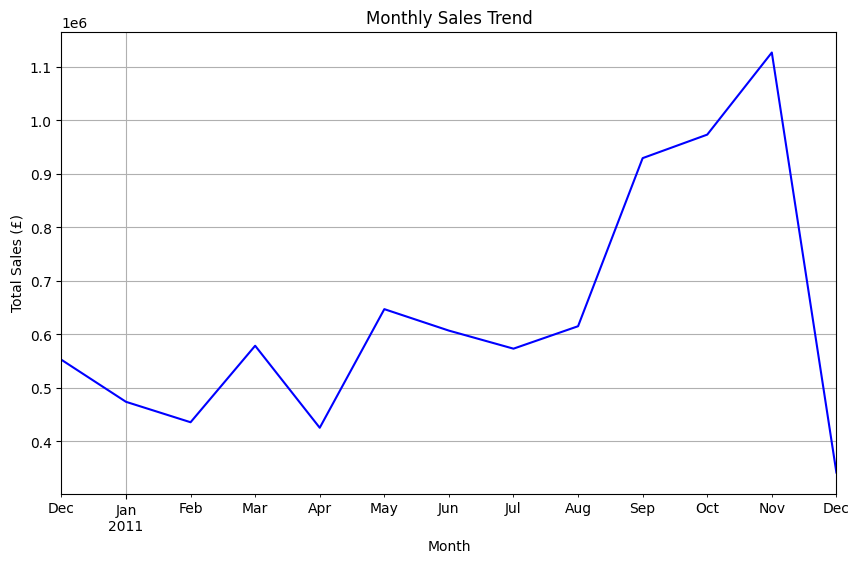

In [6]:
# Now lets go to EDA
# Add a 'TotalPrice' column (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by date (monthly sales trend)
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

# Plot monthly sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.show()

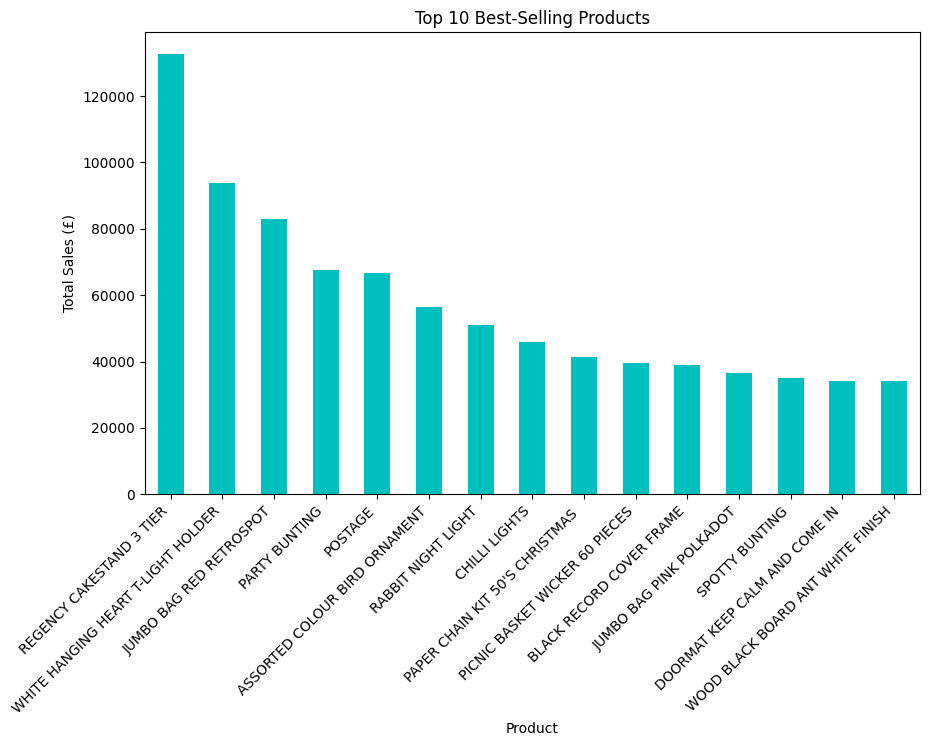

In [7]:
# Group by 'Description' and sum up 'TotalPrice' to find top-selling products
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(15)

# Plot top products
top_products.plot(kind='bar', color='c', figsize=(10,6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45, ha='right')
plt.show()

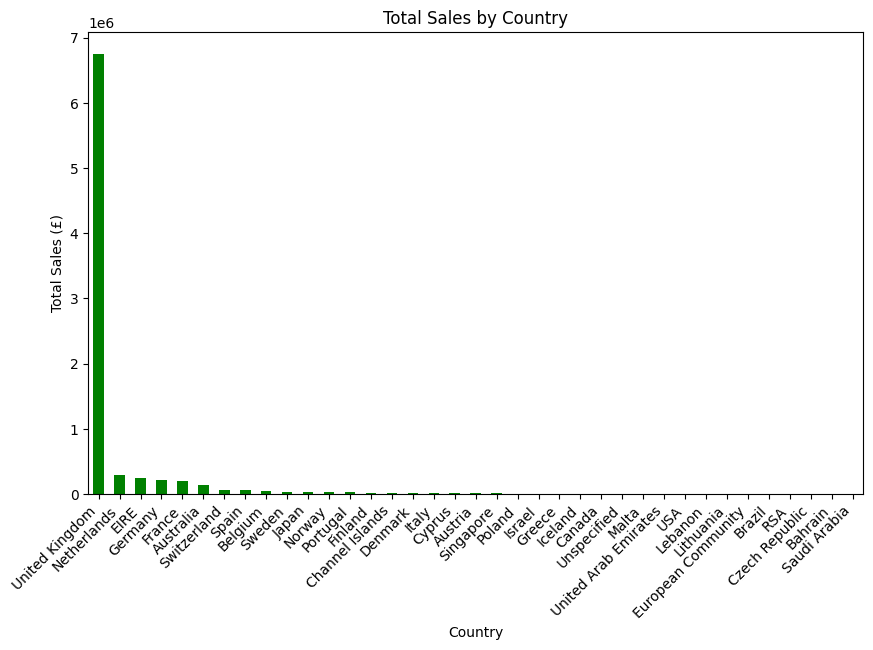

In [8]:
# Group by 'Country' and calculate total sales per country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot sales by country
country_sales.plot(kind='bar', color='g', figsize=(10,6))
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
# Print the column names to verify if 'TotalPrice' is added
print(df.columns)

# Check the first few rows to verify the 'TotalPrice' values
print(df.head())


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Month'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00

In [ ]:
# Save the updated DataFrame with the new column
df.to_csv('/content/Updated_data.csv', index=False)  # Save to a new CSV file